In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Loading the data set
data =  pd.read_csv('One_Year_of_FitBitChargeHR_Data.csv')

In [3]:
data

,Date,Calories,Steps,Distance_in_meters,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
0,8/5/2015,1.934,905.000,0.65,0,1.355,46,0,0,168.000
1,9/5/2015,3.631,18.925,14.11,4,611.000,316,61,60,2.248
2,10/5/2015,3.204,14.228,10.57,1,602.000,226,14,77,1.719
3,11/5/2015,2.673,6.756,5.02,8,749.000,190,23,4,962.000
4,12/5/2015,2.495,5.020,3.73,1,876.000,171,0,0,736.000
...,...,...,...,...,...,...,...,...,...,...
362,3/5/2016,3.796,18.588,14.13,16,599.000,275,49,79,2.360
363,4/5/2016,3.525,16.382,12.39,16,684.000,333,10,55,2.075
364,5/5/2016,3.649,21.913,16.40,19,701.000,287,29,90,2.249
365,6/5/2016,3.539,19.023,14.79,15,575.000,298,8,85,2.112


In [4]:
#Dropping first row due to disparities later down the line 
data_new = data.drop(labels=0, axis=0)

In [5]:
data_new

,Date,Calories,Steps,Distance_in_meters,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity
1,9/5/2015,3.631,18.925,14.11,4,611.0,316,61,60,2.248
2,10/5/2015,3.204,14.228,10.57,1,602.0,226,14,77,1.719
3,11/5/2015,2.673,6.756,5.02,8,749.0,190,23,4,962.000
4,12/5/2015,2.495,5.020,3.73,1,876.0,171,0,0,736.000
5,13-05-2015,2.760,7.790,5.79,15,726.0,172,34,18,1.094
...,...,...,...,...,...,...,...,...,...,...
362,3/5/2016,3.796,18.588,14.13,16,599.0,275,49,79,2.360
363,4/5/2016,3.525,16.382,12.39,16,684.0,333,10,55,2.075
364,5/5/2016,3.649,21.913,16.40,19,701.0,287,29,90,2.249
365,6/5/2016,3.539,19.023,14.79,15,575.0,298,8,85,2.112


In [6]:
# Drop all except target columns
data_trim = data_new[['Calories', 'Steps', 'Distance_in_meters', 'floors', 'Minutes_of_intense_activity']]
data_trim

,Calories,Steps,Distance_in_meters,floors,Minutes_of_intense_activity
1,3.631,18.925,14.11,4,60
2,3.204,14.228,10.57,1,77
3,2.673,6.756,5.02,8,4
4,2.495,5.020,3.73,1,0
5,2.760,7.790,5.79,15,18
...,...,...,...,...,...
362,3.796,18.588,14.13,16,79
363,3.525,16.382,12.39,16,55
364,3.649,21.913,16.40,19,90
365,3.539,19.023,14.79,15,85


In [7]:
# Normalize all columns (put them on the same scale)
data_trim_norm = (data_trim - data_trim.mean())/data_trim.std()
data_trim_norm

,Calories,Steps,Distance_in_meters,floors,Minutes_of_intense_activity
1,1.469239,1.588157,1.634320,-0.750666,0.780196
2,0.407938,0.575743,0.589873,-1.040991,1.328714
3,-0.911853,-1.034808,-1.047607,-0.363567,-1.026685
4,-1.354268,-1.408994,-1.428210,-1.040991,-1.155748
5,-0.695616,-0.811934,-0.820425,0.313857,-0.574965
...,...,...,...,...,...
362,1.879343,1.515519,1.640221,0.410632,1.393245
363,1.205778,1.040027,1.126849,0.410632,0.618868
364,1.513978,2.232205,2.309965,0.700957,1.748168
365,1.240575,1.609281,1.834948,0.313857,1.586840


In [8]:
#Confirming no extreme outliers
print(data_trim_norm['Steps'].min())

print(data_trim_norm['Steps'].max())

-2.4910289151786698
5.915220409027176


<h1> K-means clustering </h1>

In [9]:
# Elbow method
# Calculate the distortion for each number of clusters (k)

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_trim_norm)
    distortions.append(kmeanModel.inertia_)

In [10]:
distortions

[1825.0,
 997.3095889915074,
 753.8143847148955,
 631.5804477101526,
 539.9235289288249,
 482.8214792661721,
 433.3306340282427,
 384.3069881811677,
 345.6614479022787]

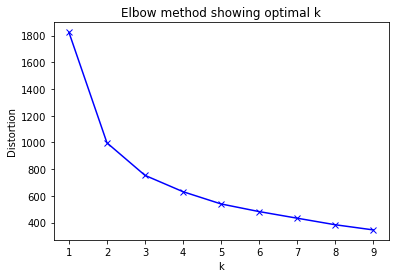

In [11]:
# Generate the elbow plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method showing optimal k')
plt.show()

# We see a rapid drop in the shape ofthe elboy from the first point of 1825 all the way down to 997. After this the shape of the 
# elbow is finally revealed 

In [12]:
# Generate clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_trim_norm)
output_kmeans = kmeans.predict(data_trim_norm)
output_kmeans

array([1, 0, 3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 1, 3, 1, 1, 3, 3, 0, 3, 3, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2,
       2, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0,
       1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 3, 0, 3, 1, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 1, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 0, 0, 3,
       3, 3, 3, 0, 3, 3, 1, 0, 3, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0,
       3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 3, 0, 1, 1, 3, 3, 3, 1, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0,

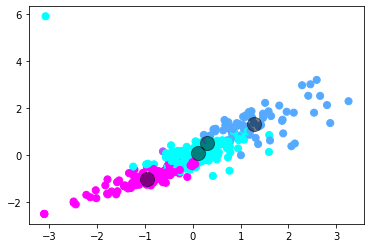

In [13]:
# Plot the clusters
plt.scatter(data_trim_norm.iloc[:, 0], data_trim_norm.iloc[:, 1], c=output_kmeans, s=50, cmap='cool')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [14]:
# Add the cluster number as a new column the data frame
data_new['cluster'] = pd.Series(output_kmeans, index=data_new.index)
data_new

,Date,Calories,Steps,Distance_in_meters,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity,cluster
1,9/5/2015,3.631,18.925,14.11,4,611.0,316,61,60,2.248,1
2,10/5/2015,3.204,14.228,10.57,1,602.0,226,14,77,1.719,0
3,11/5/2015,2.673,6.756,5.02,8,749.0,190,23,4,962.000,3
4,12/5/2015,2.495,5.020,3.73,1,876.0,171,0,0,736.000,3
5,13-05-2015,2.760,7.790,5.79,15,726.0,172,34,18,1.094,3
...,...,...,...,...,...,...,...,...,...,...,...
362,3/5/2016,3.796,18.588,14.13,16,599.0,275,49,79,2.360,1
363,4/5/2016,3.525,16.382,12.39,16,684.0,333,10,55,2.075,1
364,5/5/2016,3.649,21.913,16.40,19,701.0,287,29,90,2.249,1
365,6/5/2016,3.539,19.023,14.79,15,575.0,298,8,85,2.112,1


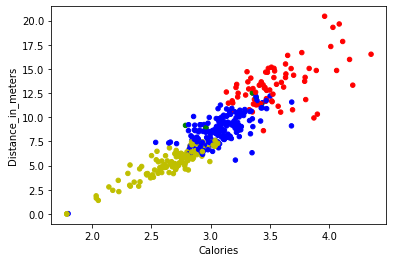

In [15]:
# Plotting example: age versus diagnosis versus cluster
color = data_new.cluster.map({0:'b', 1:'r', 2:'g', 3:'y'})
data_new.plot.scatter(x = 'Calories', y = 'Distance_in_meters', c = color)